# Travailler avec des données Netcd4-python

Dans ce tutoriel, nous allons utiliser les fonctionnalités de la librairie xarray de Python pour traiter et analyser les fichiers Netcdf. 

Pour installer la librairie sous anaconda: 

$ conda install xarray 


Voici  un exemple de strucuture d'un fichier Netcdf sous xarray: 
   


<img src="./figures/xarray.png" alt="xarray" width="60%" height="70%">


<b> DataArray </b>

xarray.DataArray est une implémentation d'un tableau multidimensionnel étiqueté pour une seule variable, telle que la précipitation, la température, etc. Il possède les propriétés clés suivantes:

<table border="1" class="docutils">
<colgroup>
<col width="27%">
<col width="57%">
</colgroup>
<tbody valign="top">
<tr><td><tt class="docutils literal"><span class="pre">values</span></tt></td>
<td>1 numpy.ndarray contenant les valeurs du champs</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">dims</span></tt></td>
<td>1 noms des dimensions pour chaque axe (par exemple, ('lat', 'lon', 'z', 'time'))</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">coords</span></tt></td>
<td>conteneur de tableaux de type dictionnaire (coordonnées) qui étiquette chaque point (par exemple, des tableaux à une dimension de nombres, des objets DateTime ou des chaînes de caractères)</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">attrs</span></tt></td>
<td>OrderedDict pour contenir des métadonnées arbitraires (attributs)</td>
</tr>
</tbody>
</table>


<b> DataSet </b>

xarray.DataSet est une collection de DataArrays. Chaque fichier NetCDF contient un DataSet.

## 1- Ouvrir un fichier Netcdf

Nous allons ouvrir et stocker les données d'un fichier Netcdf dans un Dataset. 

In [3]:
import xarray as xr
import warnings; warnings.filterwarnings(action='once')
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

Pour importer un unique fichier: 

In [4]:
unique_dataDIR = './data/cera20c/cera20c_member0_TAS_197101_day.nc'
TAS = xr.open_dataset(unique_dataDIR)
TAS

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-01-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Oct 25 14:29:40 2018: cdo daymean ./TAS/cera20c_member0...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...

Pour importer plusieurs fichiers,:  

In [5]:
multi_dataDIR = './data/cera20c/cera20c_member0_TAS_*.nc'
TAS2 = xr.open_mfdataset(multi_dataDIR)
TAS2

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>
Attributes:
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Oct 25 14:29:40 2018: cdo daymean ./TAS/cera20c_member0...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...

Pour combiner plusieurs fichiers netcdf dans le même DataArray:  

In [6]:
multi_dataDIR = './data/cera20c/cera20c_member0_TAS_*.nc'
TAS2 = xr.open_mfdataset(multi_dataDIR)
multi_dataDIR2 = './data/cera20c/cera20c_member0_SIC_*.nc'
SIC2 = xr.open_mfdataset(multi_dataDIR2)

DS_new = xr.merge([TAS2,SIC2])
DS_new

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>

## 2- Exploration des données

On peut rapidement interroger nos jeux de données en utilisants quelques méthodes du la libraire xarray: 

    - DS.var
    - DS.dims
    = DS.coords
    - DS.attrs

In [7]:
DS_new.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>>

In [8]:
DS_new.dims

Frozen(SortedKeysDict({'longitude': 288, 'latitude': 145, 'time': 365, 'bnds': 2}))

In [9]:
DS_new.coords

Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00

In [10]:
DS_new.attrs

OrderedDict()

## 3- Travailler avec les données de DataArray:

- Pour sélectionner une date:

In [11]:
DS_date = DS_new.sel(time='1971-01-01')
DS_date

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(1, 2), chunksize=(1, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(1, 145, 288), chunksize=(1, 145, 288)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(1, 145, 288), chunksize=(1, 145, 288)>

- Pour sélectionner une période, on utilise la fonctione slice():

In [12]:
DS_date_range = DS_new.sel(time=slice('1971-06-01', '1971-08-31'))
DS_date_range

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 92)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-06-01T10:30:00 ... 1971-08-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(92, 2), chunksize=(30, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(92, 145, 288), chunksize=(30, 145, 288)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(92, 145, 288), chunksize=(30, 145, 288)>

On peut ensuiter exporter ces données en un objet DataFrame de Pandas.

In [13]:
df = DS_date_range.to_dataframe()

In [14]:
df.head()

time_bnds         t2m    siconc
bnds latitude longitude time                                                
0    90.0     0.0       1971-06-01 10:30:00 1971-06-01  266.296448  0.990234
                        1971-06-02 10:30:00 1971-06-02  264.760101  0.988525
                        1971-06-03 10:30:00 1971-06-03  265.866272  0.987502
                        1971-06-04 10:30:00 1971-06-04  265.946930  0.987380
                        1971-06-05 10:30:00 1971-06-05  266.125519  0.987152

In [15]:
df.describe()

,t2m,siconc
count,7.683840e+06,7.683840e+06
mean,2.670016e+02,1.417524e-01
std,2.585196e+01,3.120009e-01
min,1.925624e+02,0.000000e+00
25%,2.732214e+02,0.000000e+00
50%,2.857340e+02,0.000000e+00
75%,2.963880e+02,0.000000e+00
max,3.148035e+02,1.000000e+00


- Pour effectuer des opérations sur un DataArray:  exemple moyenne sur tous les pas de temps . 

In [16]:
Mean_array = DS_date_range.mean(dim='time')
Mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
Data variables:
    t2m        (latitude, longitude) float32 dask.array<shape=(145, 288), chunksize=(145, 288)>
    siconc     (latitude, longitude) float32 dask.array<shape=(145, 288), chunksize=(145, 288)>>

- Pour sauvegarder notre moyenne en csv: 

In [17]:
Mean_array.t2m.to_dataframe().to_csv('./data/mean.csv')

- Autre exemple moyenne sur le temps et toutes les longitudes pour la variable t2m: 

In [18]:
DS_date_range.t2m.mean(dim=('latitude', 'longitude'))

<xarray.DataArray 't2m' (time: 92)>
dask.array<shape=(92,), dtype=float32, chunksize=(30,)>
Coordinates:
  * time     (time) datetime64[ns] 1971-06-01T10:30:00 ... 1971-08-31T10:30:00

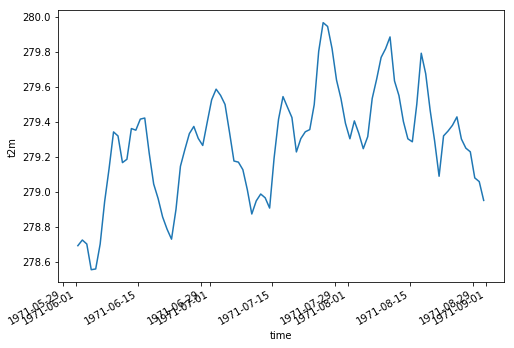

In [20]:
DS_date_range.t2m.mean(dim=('latitude', 'longitude')).plot()

- Pour sauvegarder en csv:

In [21]:
DS_date_range.t2m.mean(dim=('time', 'longitude')).to_dataframe().to_csv('./data/mean2.csv')

Tout comme Pandas, la librairie Xarray a des fonctions graphiques intégrées. 

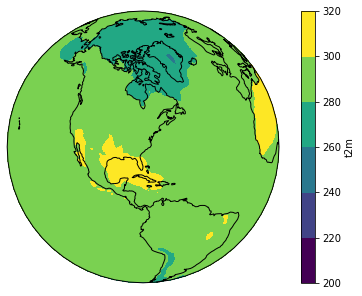

In [23]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
Mean_array.t2m.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

- Pour effectuer des opérations arythmétiques sur les DataArray:

In [24]:
centigrade = DS_date_range.t2m.mean(dim='time') - 273.16
centigrade.values

array([[ -1.2229004,  -1.2229004,  -1.2229004, ...,  -1.2229004,
         -1.2229004,  -1.2229004],
       [ -1.3348389,  -1.3311157,  -1.3274231, ...,  -1.3488159,
         -1.3442383,  -1.3395386],
       [ -1.6027222,  -1.5914001,  -1.5804138, ...,  -1.6451721,
         -1.631012 ,  -1.6168518],
       ...,
       [-58.547928 , -58.5663   , -58.58455  , ..., -58.314026 ,
        -58.391983 , -58.46997  ],
       [-59.556473 , -59.577957 , -59.59955  , ..., -59.478424 ,
        -59.50441  , -59.53041  ],
       [-60.739105 , -60.739105 , -60.739105 , ..., -60.739105 ,
        -60.739105 , -60.739105 ]], dtype=float32)

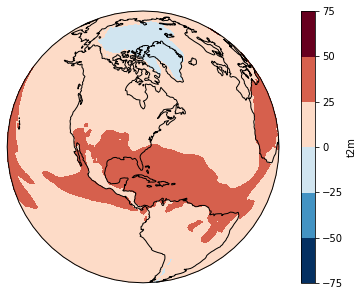

In [25]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
centigrade.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

- Tout comme avec des DataFrames, on peut appeller des méthodes groupby() pour grouper et calculer ensuite des moyennes mensuelles, saisonnières, annuelles...

In [26]:
# calcul des moyennes mensuelles:
DS_month = DS_new.groupby('time.month').mean('time')
DS_month.to_dataframe()

t2m    siconc
latitude longitude month                      
 90.0    0.00      1      239.082809  0.992785
                   2      248.876785  0.991854
                   3      245.466354  0.992002
                   4      250.193619  0.996097
                   5      261.425751  0.985464
                   6      270.787933  0.988238
                   7      273.697418  0.971385
                   8      271.288910  0.934232
                   9      263.721649  0.955152
                   10     251.617783  0.982677
                   11     244.785156  0.997934
                   12     244.384155  0.994771
         1.25      1      239.082809  0.992785
                   2      248.876785  0.991854
                   3      245.466354  0.992002
                   4      250.193619  0.996097
                   5      261.425751  0.985464
                   6      270.787933  0.988238
                   7      273.697418  0.971385
                   8      271.288910  0.934232
                   9      263.721649  0.955152
                   10     251.617783  0.982677
                   11     244.785156  0.997934
                   12     244.384155  0.994771
         2.50      1      239.082809  0.992785
                   2      248.876785  0.991854
                   3      245.466354  0.992002
                   4      250.193619  0.996097
                   5      261.425751  0.985464
                   6      270.787933  0.988238
...                              ...       ...
-90.0    356.25    7      210.696625  0.000000
                   8      214.138046  0.000000
                   9      216.979095  0.000000
                   10     222.730240  0.000000
                   11     234.428238  0.000000
                   12     243.433029  0.000000
         357.50    1      247.900192  0.000000
                   2      236.211182  0.000000
                   3      224.780731  0.000000
                   4      219.791199  0.000000
                   5      218.910049  0.000000
                   6      212.428238  0.000000
                   7      210.696625  0.000000
                   8      214.138046  0.000000
                   9      216.979095  0.000000
                   10     222.730240  0.000000
                   11     234.428238  0.000000
                   12     243.433029  0.000000
         358.75    1      247.900192  0.000000
                   2      236.211182  0.000000
                   3      224.780731  0.000000
                   4      219.791199  0.000000
                   5      218.910049  0.000000
                   6      212.428238  0.000000
                   7      210.696625  0.000000
                   8      214.138046  0.000000
                   9      216.979095  0.000000
                   10     222.730240  0.000000
                   11     234.428238  0.000000
                   12     243.433029  0.000000

[501120 rows x 2 columns]

In [27]:
climatology = DS_new.groupby('time.month').mean('time')
anomalies = DS_new.groupby('time.month') - climatology
anomalies

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
    month      (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(365, 145, 288), chunksize=(31, 145, 288)>

In [28]:
# calcul des moyennes saisonnières:
DS_season = DS_new.groupby('time.season').mean('time')
DS_season

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    t2m        (season, latitude, longitude) float32 dask.array<shape=(4, 145, 288), chunksize=(1, 145, 288)>
    siconc     (season, latitude, longitude) float32 dask.array<shape=(4, 145, 288), chunksize=(1, 145, 288)>

In [29]:
# calcul des moyennes annuelles:
DS_year = DS_new.groupby('time.year').mean('time')
DS_year

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, year: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * year       (year) int64 1971
Data variables:
    t2m        (year, latitude, longitude) float32 dask.array<shape=(1, 145, 288), chunksize=(1, 145, 288)>
    siconc     (year, latitude, longitude) float32 dask.array<shape=(1, 145, 288), chunksize=(1, 145, 288)>

Pour extraire une saison. 

In [30]:
DS_hiver = DS_season.sel(season='DJF')
DS_hiver

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
    season     <U3 'DJF'
Data variables:
    t2m        (latitude, longitude) float32 dask.array<shape=(145, 288), chunksize=(145, 288)>
    siconc     (latitude, longitude) float32 dask.array<shape=(145, 288), chunksize=(145, 288)>

Dans l'exemple ci-dessous, nous allos grouper les données du xarray.DataArray par saison, calculer la moyenne, appliquer une simple opération arythmétique et tracer pour chaque saison les champs résultants.  

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

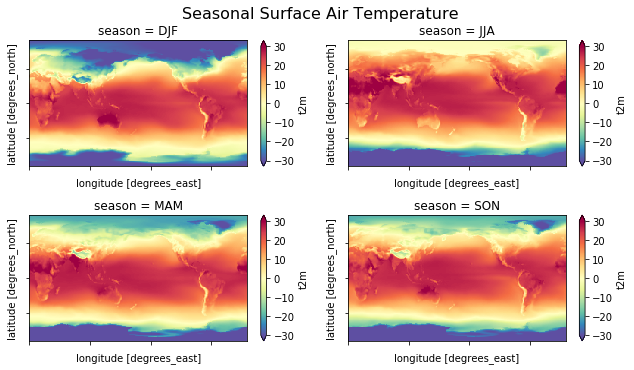

In [31]:
DS_Season = DS_new.t2m.groupby('time.season').mean('time')- 273.15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5))
j = 0
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        j += 1
        i = 0
    elif season =='SON':
        i = 1
        
    DS_Season.sel(season=season).plot.pcolormesh(
        ax=axes[i, j], vmin=-30, vmax=30, cmap='Spectral_r',
        add_colorbar=True, extend='both')

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('Seasonal Surface Air Temperature', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Seasonal Sea Ice Concentration')

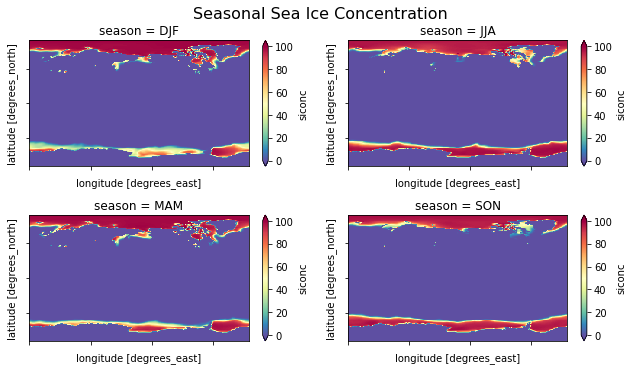

In [33]:
DS_Season = DS_new.siconc.groupby('time.season').mean('time') *100
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5))
j = 0
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        j += 1
        i = 0
    elif season =='SON':
        i = 1
        
    DS_Season.sel(season=season).plot.pcolormesh(
        ax=axes[i, j], vmin=0, vmax=100, cmap='Spectral_r',
        add_colorbar=True, extend='both')

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('Seasonal Sea Ice Concentration', fontsize=16, y=1.02)

Pour sauvegarder notre champs en netcdf: 

In [34]:
DS_season = DS_new.groupby('time.season').mean('time')
dataDIR = './data/season.nc'
DS_Season.to_netcdf(dataDIR)


##  4- Extraire des points de grille d'un fichier Netcdf

Dans la section précédente nous avons appliqué la méthode .sel() pour travailler sur la dimension temporelle. On peut utiliser cette méthode sur les dimensions spatiales pour extraire des points ou des régions d'études de notre fichier netcdf.

- pour extraire le point de grille le plus proche d'une latitude / longitude: 

In [35]:
lati = 45.5
loni = 269.2
data  = DS_new.sel(longitude=loni  , latitude=lati  , method='nearest') 
data

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 365)
Coordinates:
    longitude  float32 268.75
    latitude   float32 45.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time) float32 dask.array<shape=(365,), chunksize=(31,)>
    siconc     (time) float32 dask.array<shape=(365,), chunksize=(31,)>

On peut ensuite le convertir en pandas.DataFrame et utilisé les fonctionnalités graphiques de Pandas.

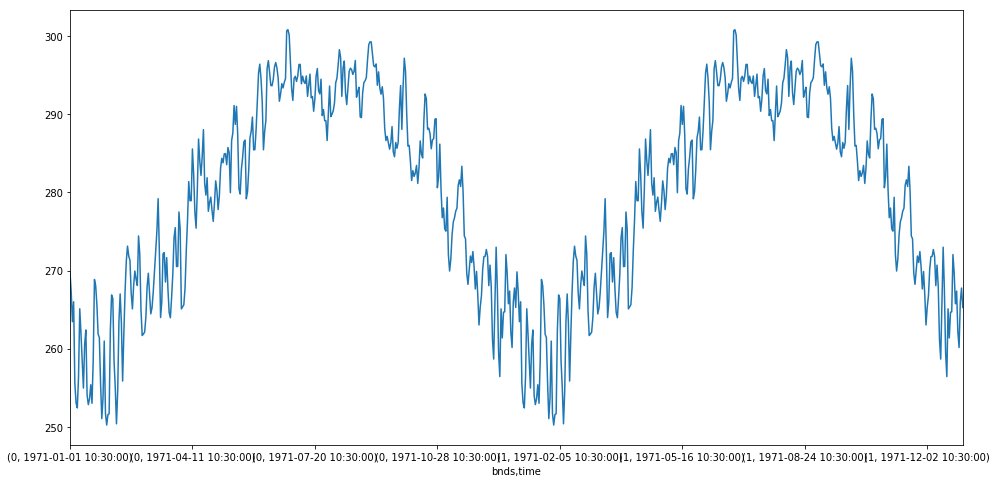

In [36]:
df = data.to_dataframe()
fig = plt.figure(figsize=(16,8))
df['t2m'].plot()


- pour extraire une liste de points de grille: 

In [37]:
lats =  [40.0,50.0,60.0]
lons =  [60.0,70.0,80.0]

data  = DS_new.sel(longitude=lons  , latitude=lats  , method='nearest')
df = data.to_dataframe()
data

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 3, longitude: 3, time: 365)
Coordinates:
  * longitude  (longitude) float32 60.0 70.0 80.0
  * latitude   (latitude) float32 40.0 50.0 60.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 3, 3), chunksize=(31, 3, 3)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(365, 3, 3), chunksize=(31, 3, 3)>

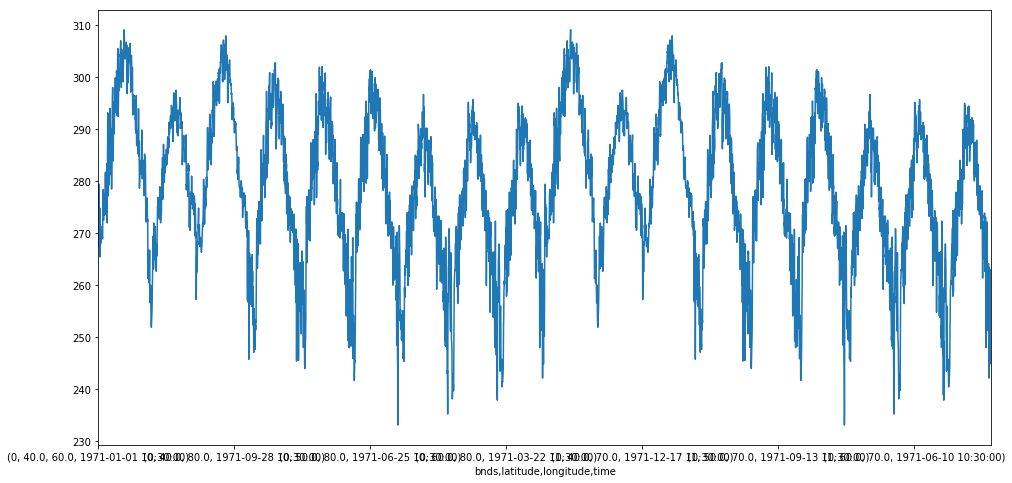

In [38]:
fig = plt.figure(figsize=(16,8))
df['t2m'].plot()

- Pour extraire une région, on utlise la fonction slice(): 

In [39]:
lat_bnd = [80, 50]
lon_bnd = [250, 310]
area = DS_new.sel(longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),)
area

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 25, longitude: 49, time: 365)
Coordinates:
  * longitude  (longitude) float32 250.0 251.25 252.5 ... 307.5 308.75 310.0
  * latitude   (latitude) float32 80.0 78.75 77.5 76.25 ... 52.5 51.25 50.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<shape=(365, 2), chunksize=(31, 2)>
    t2m        (time, latitude, longitude) float32 dask.array<shape=(365, 25, 49), chunksize=(31, 25, 49)>
    siconc     (time, latitude, longitude) float32 dask.array<shape=(365, 25, 49), chunksize=(31, 25, 49)>

In [40]:
area.longitude.values

array([250.  , 251.25, 252.5 , 253.75, 255.  , 256.25, 257.5 , 258.75,
       260.  , 261.25, 262.5 , 263.75, 265.  , 266.25, 267.5 , 268.75,
       270.  , 271.25, 272.5 , 273.75, 275.  , 276.25, 277.5 , 278.75,
       280.  , 281.25, 282.5 , 283.75, 285.  , 286.25, 287.5 , 288.75,
       290.  , 291.25, 292.5 , 293.75, 295.  , 296.25, 297.5 , 298.75,
       300.  , 301.25, 302.5 , 303.75, 305.  , 306.25, 307.5 , 308.75,
       310.  ], dtype=float32)

Pour visualiser notre domaine d'extraction: 

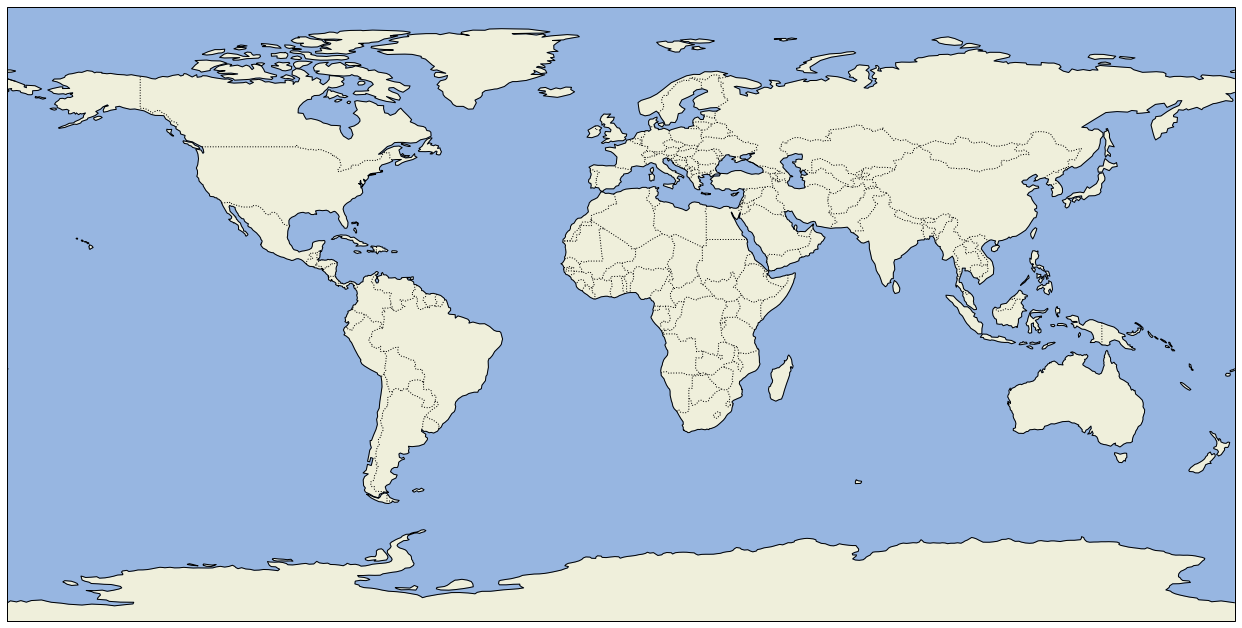

In [41]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
def make_figure():
    fig = plt.figure(figsize=(22, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

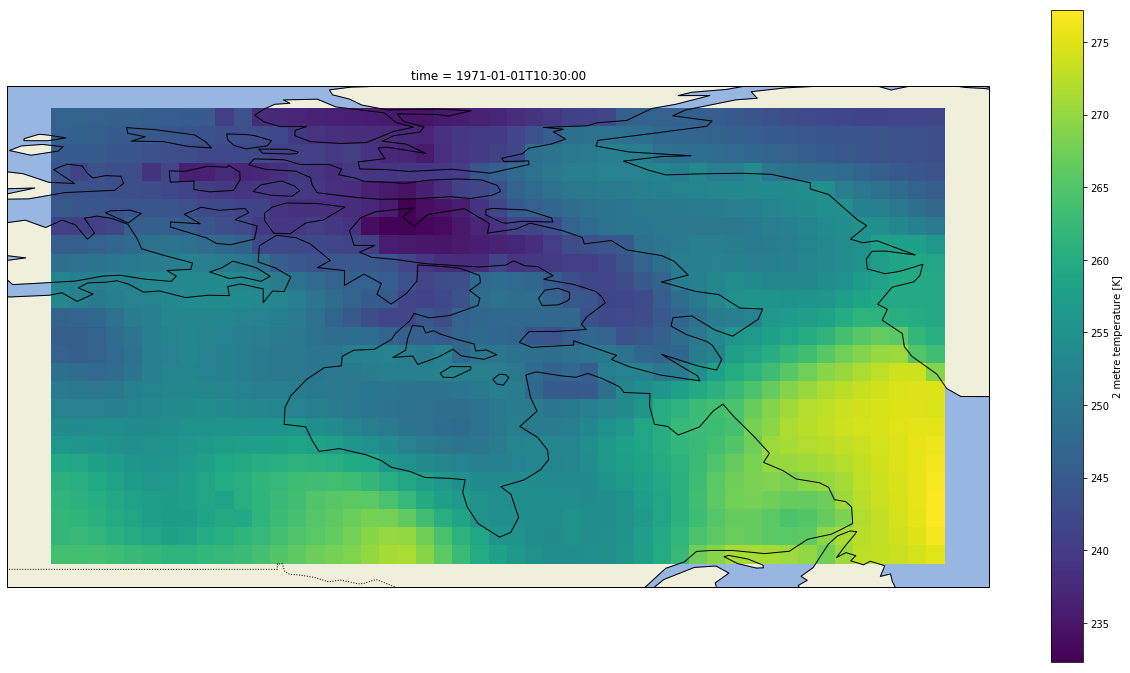

In [42]:
_, ax = make_figure()
# plot the temperature field
area.t2m[0].plot()

##  5- Cas pratique: 
Nous allons calculer l'accumulation saisonnière de la précipitation, extraire une région, tracer le domaine et enregistrer notre résultat en Netcdf: 

In [43]:
multi_dataDIR = './data/cera20c/cera20c_enda_ep_PR_*.nc'
array = xr.open_mfdataset(multi_dataDIR)
array.tp

<xarray.DataArray 'tp' (time: 365, latitude: 181, longitude: 360)>
dask.array<shape=(365, 181, 360), dtype=float32, chunksize=(31, 181, 360)>
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1971-01-02T18:00:00 ... 1972-01-01T18:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [44]:
array_season = array.groupby('time.season').sum('time')*1000
lat_bnd = [70, 50]
lon_bnd = [250, 310]
subset_season_DJF = array_season.sel(season = 'DJF', longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),)
subset_season_DJF

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 61)
Coordinates:
    season     <U3 'DJF'
  * longitude  (longitude) float32 250.0 251.0 252.0 253.0 ... 308.0 309.0 310.0
  * latitude   (latitude) float32 70.0 69.0 68.0 67.0 ... 53.0 52.0 51.0 50.0
Data variables:
    tp         (latitude, longitude) float32 dask.array<shape=(21, 61), chunksize=(21, 61)>

In [45]:
dataDIR = './data/subset_season.nc'
subset_season_DJF.to_netcdf(dataDIR)

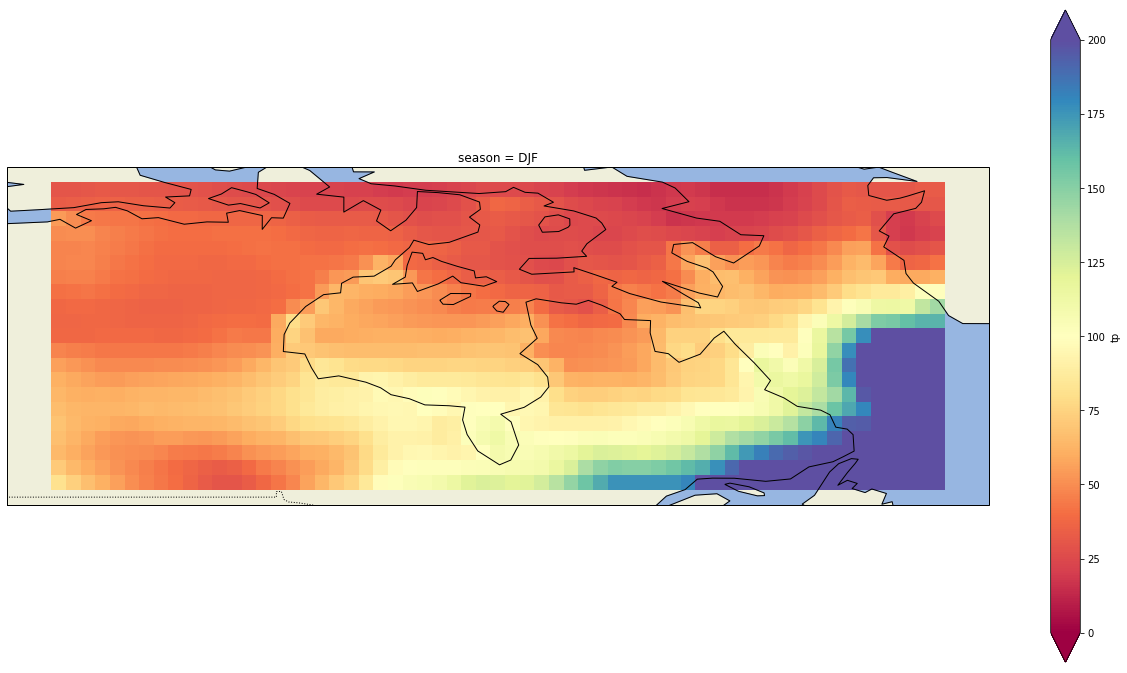

In [46]:
_, ax = make_figure()
# plot the temperature field
subset_season_DJF.tp.plot.pcolormesh(vmin=0, vmax=200, cmap='Spectral',add_colorbar=True, extend='both')

In [47]:
array_season

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, season: 4)
Coordinates:
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
Data variables:
    tp         (season, latitude, longitude) float32 dask.array<shape=(4, 181, 360), chunksize=(1, 181, 360)>